<a href="https://colab.research.google.com/github/KarenLira25/Proyecto-Redes-Neuronales/blob/main/Proyecto_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Silvia Karen Retama Lira

##1. Entrena una red neuronal para que reproduzca la siguientes funciones en
el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la
gráfica de la función.
*   $3 sin(πx)$
*   $1 + 2x + 4x^3$


In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import asarray
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [106]:
# Conjunto de datos
x = np.arange(-1, 1, 0.001)
y = asarray([3*np.sin(math.pi*i) for i in x]) #convertir la estructura de los datos en un array NumPy
print(x.min(), x.max(), y.min(), y.max())

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))


#es
esc_x = MinMaxScaler()
x = esc_x.fit_transform(x)
esc_y = MinMaxScaler() 
y = esc_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9990000000000019 -3.0 3.0
0.0 0.9999999999999999 0.0 1.0


63/63 [==============================] - 0s 1ms/step


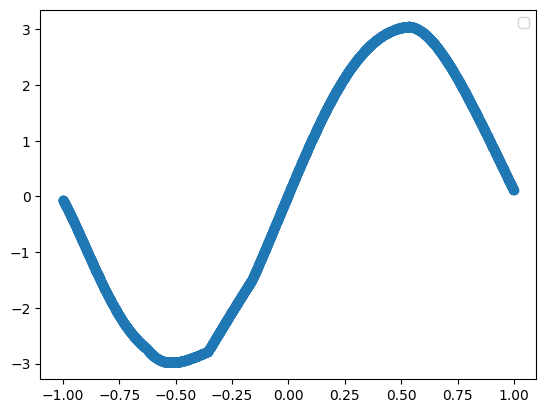

In [107]:
#diseño del modelo de la red neuronal
modelo = Sequential()
modelo.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))


modelo.compile(loss= 'mse', optimizer='adam')               #función de pérdida y algoritmo de optimización
modelo.fit(x, y, epochs=150, batch_size=10, verbose=0)     #modelo con los datos de entrenamiento
y1 = modelo.predict(x)                                   #predicciones para los datos de entrada

# transformadas inversas
x_0 = esc_x.inverse_transform(x)
y_0 = esc_y.inverse_transform(y)
y1_0 = esc_y.inverse_transform(y1)

#gráfica
plt.scatter(x_0,y1_0)
plt.legend()
plt.show()

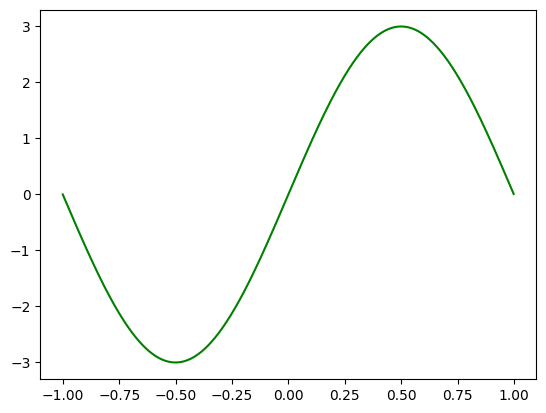

In [108]:
x = np.arange(-1, 1, 0.001)
y =  3*np.sin(math.pi*x)
plt.plot(x, y, color='green')
plt.show()

In [109]:
#math.sin(x)

##2. Elegir un problema de los siguientes

*  Detectar fraudes en movimientos de tarjetas bancarias: https://www.kaggle.com/mlg-ulb/creditcardfraud
*  Identificar enfermedades en plantas: https://www.kaggle.com/competitionsplant-pathology-2021-fgvc8/data
y diseñnar y entrenar una red neuronal con keras.